In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use(['dark_background'])

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Numerical vs Categorical

In [3]:
all_numerical = ['LotArea',
                 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                 '1stFlrSF', '2ndFlrSF', 
                 'LowQualFinSF', 'GrLivArea',
                 'GarageArea',
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

drop_num = ['GarageArea', 'TotRmsAbvGrd', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF', 'LowQualFinSF']
chosen_num = list(set(all_numerical) - set(drop_num))
chosen_num 

['EnclosedPorch',
 '1stFlrSF',
 'WoodDeckSF',
 'GrLivArea',
 'LotArea',
 '2ndFlrSF',
 'TotalBsmtSF',
 'OpenPorchSF',
 'ScreenPorch']

In [4]:
all_categorical = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                   'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                   'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
                   'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
                   'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
                   'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                   'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

drop_cat = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
chosen_cat = list(set(all_categorical) - set(drop_cat))
chosen_cat

['OverallQual',
 'LandContour',
 'YearRemodAdd',
 'CentralAir',
 'BsmtFullBath',
 'YearBuilt',
 'ExterQual',
 'ExterCond',
 'OverallCond',
 'MoSold',
 'Foundation',
 'SaleType',
 'Neighborhood',
 'Fireplaces',
 'FullBath',
 'LotConfig',
 'Exterior1st',
 'LotShape',
 'KitchenQual',
 'Exterior2nd',
 'HalfBath',
 'MSSubClass',
 'GarageCars',
 'RoofStyle',
 'PavedDrive',
 'YrSold',
 'Electrical',
 'KitchenAbvGr',
 'HouseStyle',
 'Functional',
 'BldgType',
 'SaleCondition',
 'BedroomAbvGr',
 'HeatingQC',
 'MSZoning',
 'BsmtHalfBath',
 'Condition1',
 'LandSlope',
 'TotRmsAbvGrd']

# NaN

Drop cols with more than 15% NaN

In [5]:
nan_total = df_train.isna().sum().sort_values(ascending = False)
nan_perc = (df_train.isna().sum() / df_train.isna().count()).sort_values(ascending = False)
nan_values = pd.concat([nan_total, nan_perc], axis = 1, keys = ['Total', 'Percentage'])
nan_values.head(35)

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [6]:
drop_cols = (nan_values[nan_values['Total'] > 1]).index

df_train.drop(drop_cols, axis = 1, inplace = True)

# nan_cols = ['MSZoning', 'BsmtHalfBath', 'Utilities', 'Functional',
#             'BsmtFullBath', 'BsmtFinSF1', 'Exterior1st', 'Exterior2nd',
#             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SaleType',
#             'Electrical', 'KitchenQual', 'GarageArea', 'GarageCars']
df_train.drop(df_train[df_train['Electrical'].isna()].index, inplace = True)
    
df_train.isna().sum().max()

0

In [7]:
na_cols = ['Functional', 'Exterior2nd', 'BsmtFullBath', 'SaleType', 'BsmtHalfBath',
           'Exterior1st', 'KitchenQual', 'GarageCars', 'MSZoning', 'TotalBsmtSF']
na_num = [col for col in na_cols if col in chosen_num]
na_cat = [col for col in na_cols if col in chosen_cat]

for col in na_num:
    df_test[col].fillna(0, inplace = True)
    
for col in na_cat:
    max_val = df_test[col].value_counts().index[0]
    df_test[col].fillna(max_val, inplace = True)
    
df_test.drop(drop_cols, axis = 1, inplace = True)
    
df_test.isna().sum().max()

2

In [8]:
train_labels = df_train.pop('SalePrice')
df_full = pd.concat([df_train, df_test], keys=['train', 'test'])
print('Train:', df_train.shape)
print('Test:', df_test.shape)
print('Full:', df_full.shape)

Train: (1459, 62)
Test: (1459, 62)
Full: (2918, 62)


## Numerical

In [9]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm

def plot_norm(col_name):
    sns.distplot(df_full[col_name], fit = norm)
    fig = plt.figure()
    
def log_transform(col_name, extract_zero = False):
    plot_norm(col_name)
    
    if extract_zero:
        df_full['temp'] = 0
        df_full.loc[df_full[col_name] > 0, 'temp'] = 1
        df_full.loc[df_full['temp'] == 1, col_name] = np.log(df_full[col_name])
        df_full.drop(['temp'], axis = 1, inplace = True)
    else:
        df_full[col_name] = np.log(df_full[col_name])
        
    plot_norm(col_name)

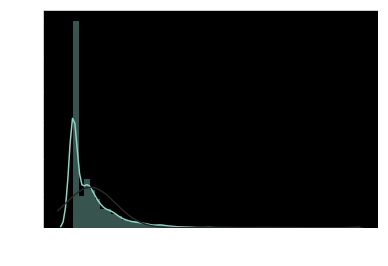

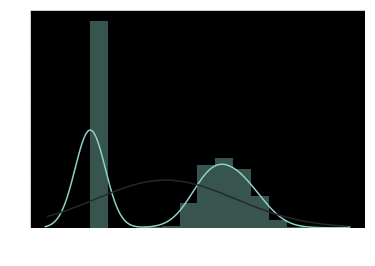

<Figure size 432x288 with 0 Axes>

In [10]:
log_transform('OpenPorchSF', extract_zero = True)

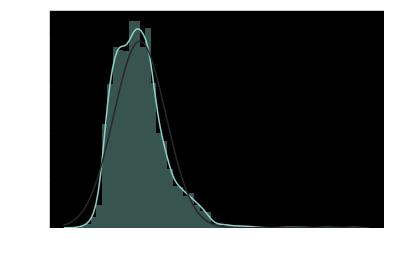

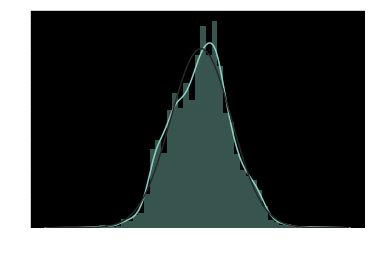

<Figure size 432x288 with 0 Axes>

In [11]:
log_transform('GrLivArea')

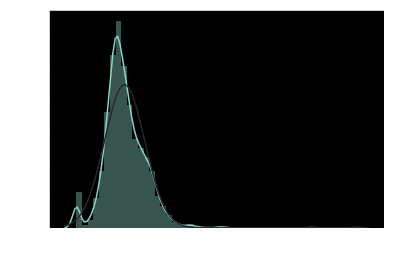

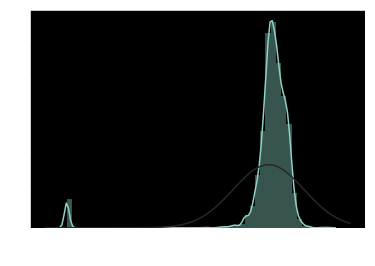

<Figure size 432x288 with 0 Axes>

In [12]:
log_transform('TotalBsmtSF', extract_zero = True)

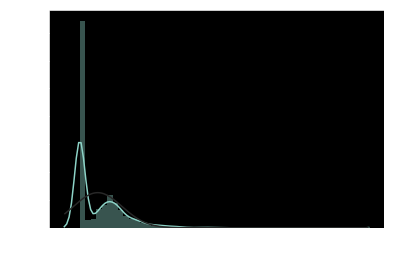

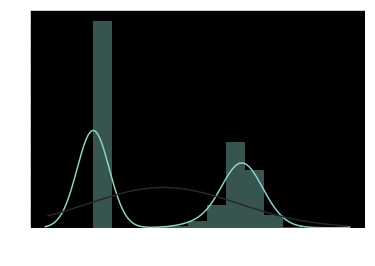

<Figure size 432x288 with 0 Axes>

In [13]:
log_transform('WoodDeckSF', extract_zero = True)

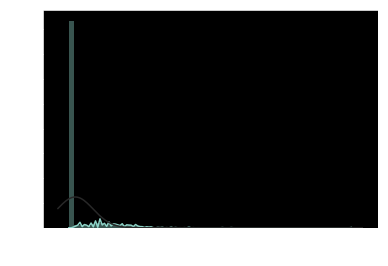

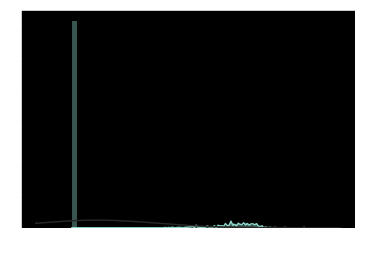

<Figure size 432x288 with 0 Axes>

In [14]:
log_transform('EnclosedPorch', extract_zero = True)

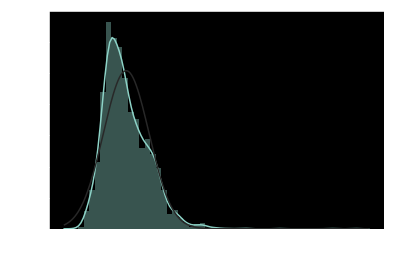

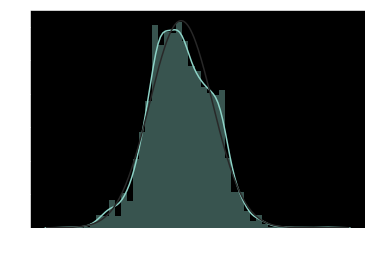

<Figure size 432x288 with 0 Axes>

In [15]:
log_transform('1stFlrSF')

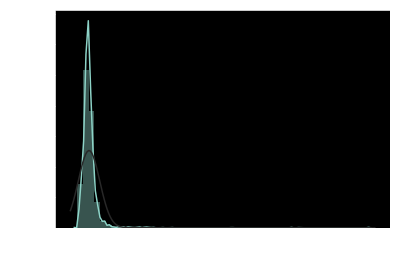

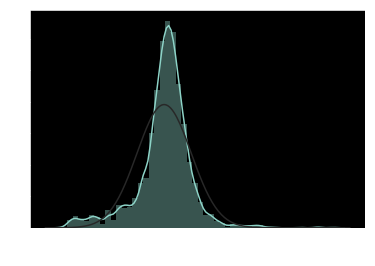

<Figure size 432x288 with 0 Axes>

In [16]:
log_transform('LotArea')

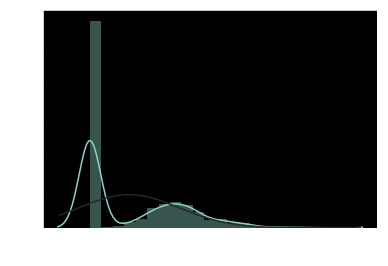

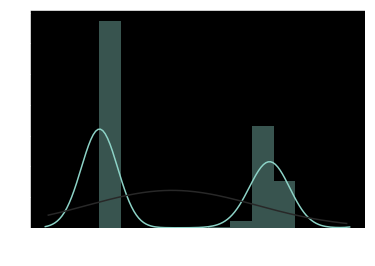

<Figure size 432x288 with 0 Axes>

In [17]:
log_transform('2ndFlrSF', extract_zero = True)

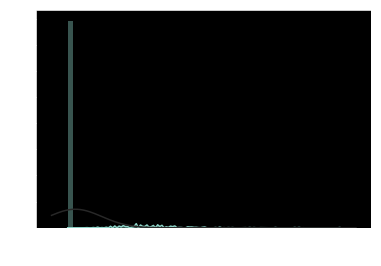

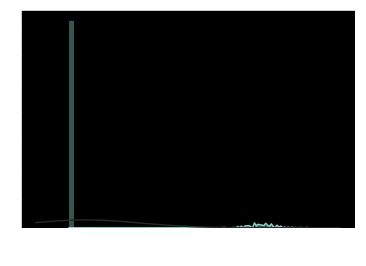

<Figure size 432x288 with 0 Axes>

In [18]:
log_transform('ScreenPorch', extract_zero = True)

## Categorical

In [19]:
def plot_cat(feature):
    sns.countplot(data = df_full,x = feature)
    ax = sns.countplot(data = df_full, x = feature)
    fig = plt.figure()

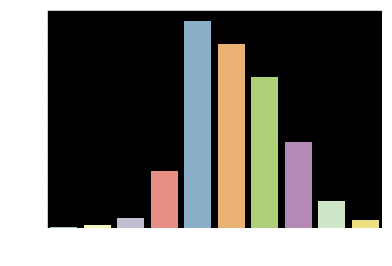

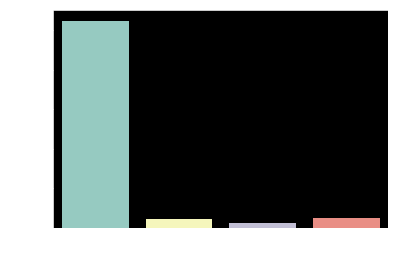

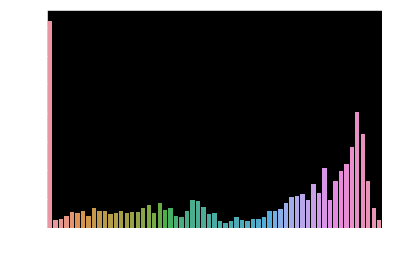

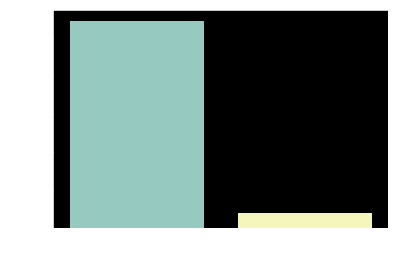

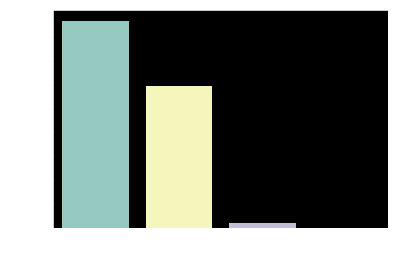

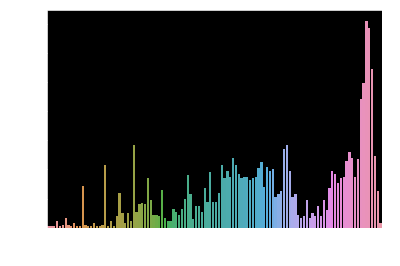

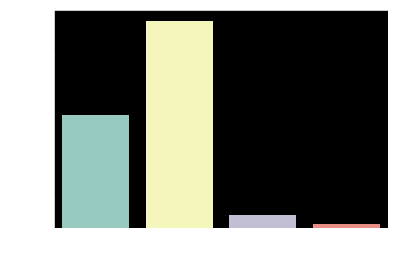

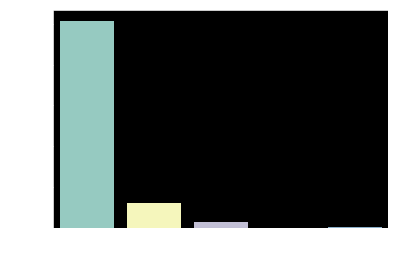

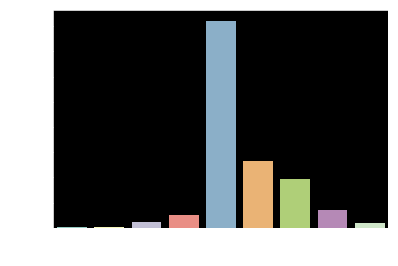

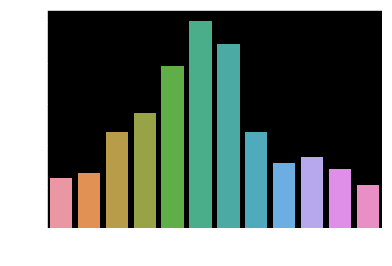

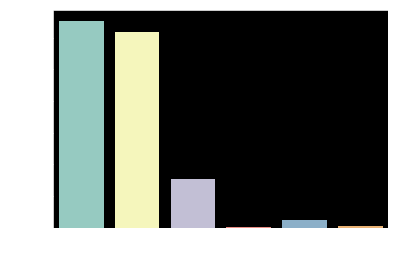

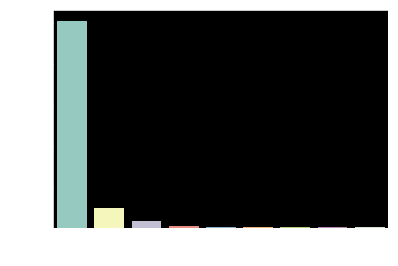

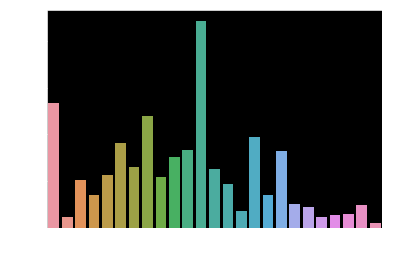

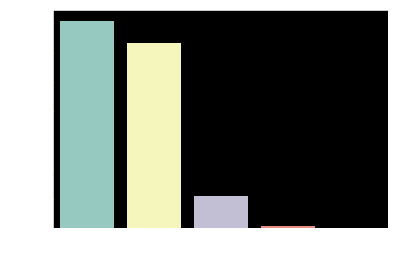

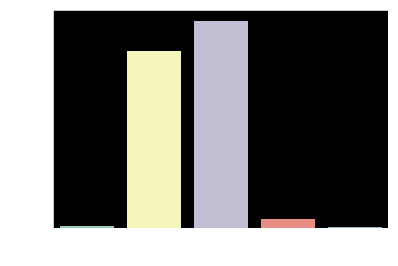

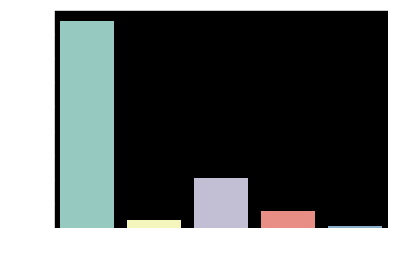

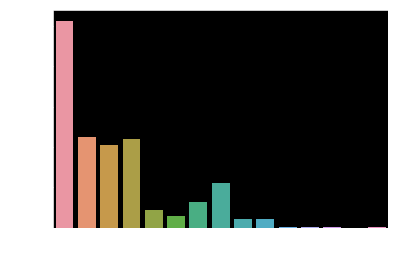

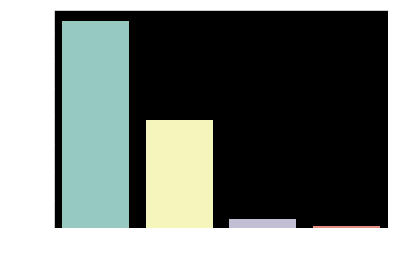

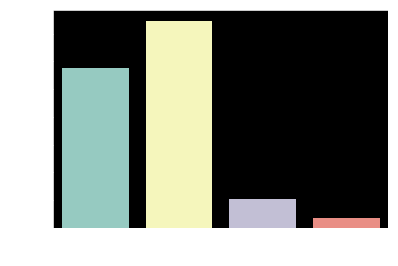

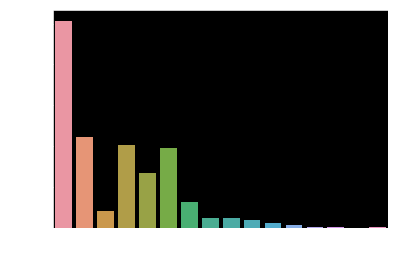

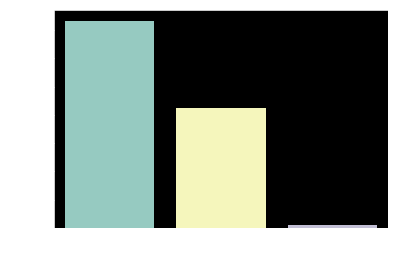

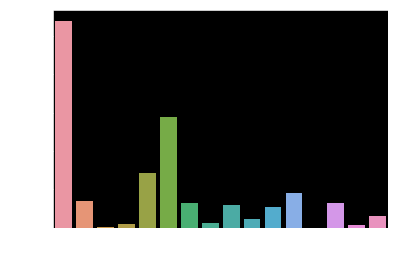

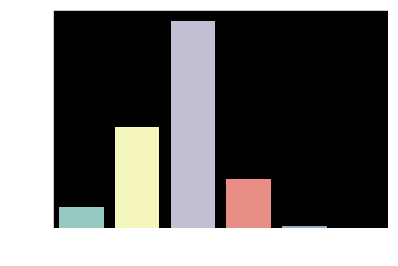

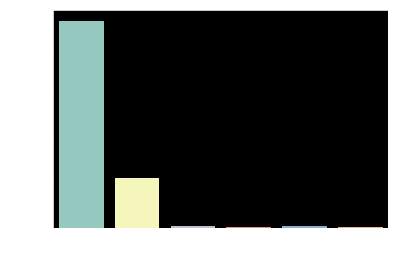

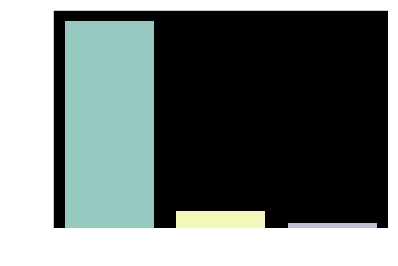

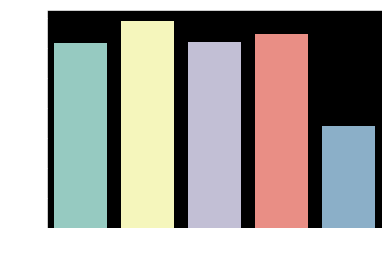

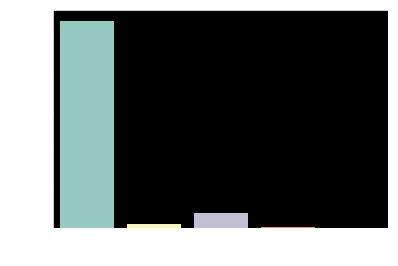

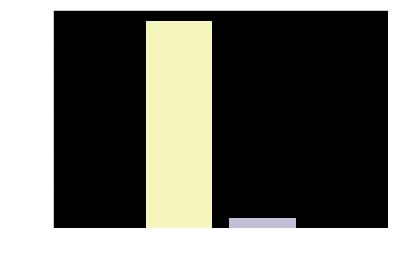

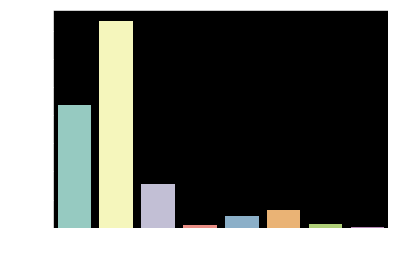

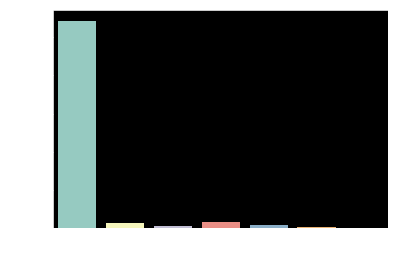

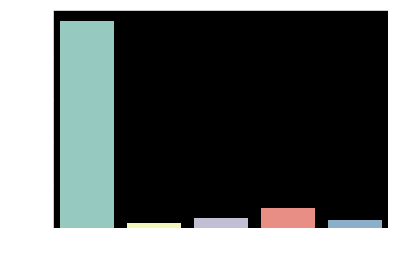

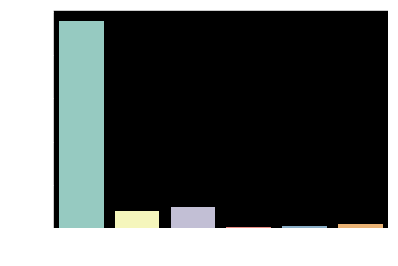

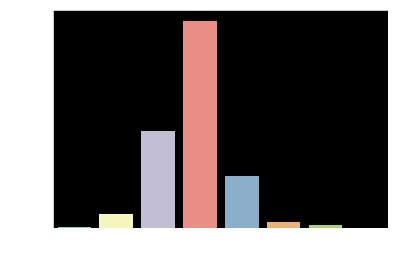

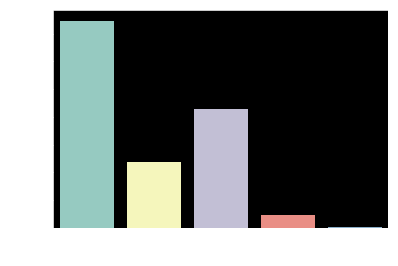

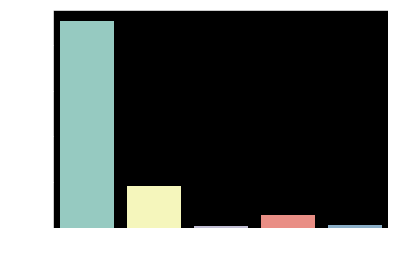

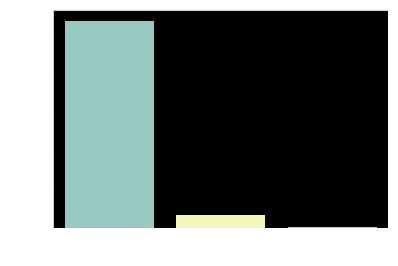

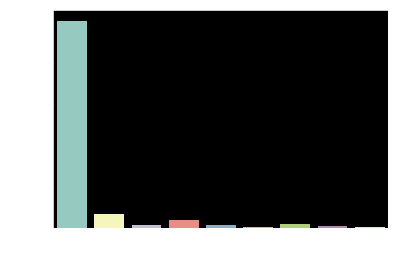

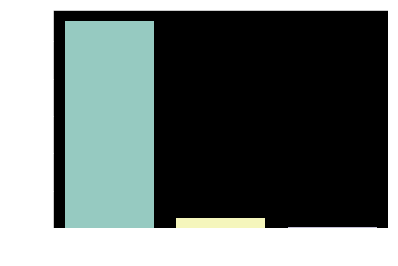

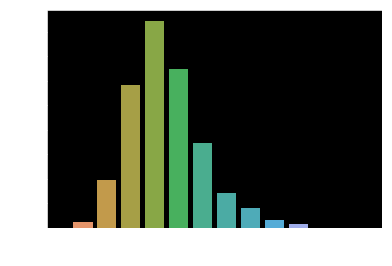

<Figure size 432x288 with 0 Axes>

In [20]:
for col in chosen_cat:
    plot_cat(col)

## Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

for col in chosen_cat:
    if df_full[col].dtype == 'object':
        print(col)
        le = LabelEncoder()
        df_full[col] = le.fit_transform(df_full[col])
        
df_full.head(10)

LandContour
CentralAir
ExterQual
ExterCond
Foundation
SaleType
Neighborhood
LotConfig
Exterior1st
LotShape
KitchenQual
Exterior2nd
RoofStyle
PavedDrive
Electrical
HouseStyle
Functional
BldgType
SaleCondition
HeatingQC
MSZoning
Condition1
LandSlope


Id  MSSubClass  MSZoning   LotArea Street  LotShape  LandContour  \
train 0   1          60         3  9.041922   Pave         3            3   
      1   2          20         3  9.169518   Pave         3            3   
      2   3          60         3  9.328123   Pave         0            3   
      3   4          70         3  9.164296   Pave         0            3   
      4   5          60         3  9.565214   Pave         0            3   
      5   6          50         3  9.554993   Pave         0            3   
      6   7          20         3  9.218705   Pave         3            3   
      7   8          60         3  9.247829   Pave         0            3   
      8   9          50         4  8.719317   Pave         3            3   
      9  10         190         3  8.911934   Pave         3            3   

        Utilities  LotConfig  LandSlope  Neighborhood  Condition1 Condition2  \
train 0    AllPub          4          0             5           2       Norm   
      1    AllPub          2          0            24           1       Norm   
      2    AllPub          4          0             5           2       Norm   
      3    AllPub          0          0             6           2       Norm   
      4    AllPub          2          0            15           2       Norm   
      5    AllPub          4          0            11           2       Norm   
      6    AllPub          4          0            21           2       Norm   
      7    AllPub          0          0            14           4       Norm   
      8    AllPub          4          0            17           0       Norm   
      9    AllPub          0          0             3           0     Artery   

         BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
train 0         0           5            7            5       2003   
      1         0           2            6            8       1976   
      2         0           5            7            5       2001   
      3         0           5            7            5       1915   
      4         0           5            8            5       2000   
      5         0           0            5            5       1993   
      6         0           2            8            5       2004   
      7         0           5            7            6       1973   
      8         0           0            7            5       1931   
      9         1           1            5            6       1939   

         YearRemodAdd  RoofStyle RoofMatl  Exterior1st  Exterior2nd  \
train 0          2003          1  CompShg           12           13   
      1          1976          1  CompShg            8            8   
      2          2002          1  CompShg           12           13   
      3          1970          1  CompShg           13           15   
      4          2000          1  CompShg           12           13   
      5          1995          1  CompShg           12           13   
      6          2005          1  CompShg           12           13   
      7          1973          1  CompShg            6            6   
      8          1950          1  CompShg            3           15   
      9          1950          1  CompShg            8            8   

         ExterQual  ExterCond  Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
train 0          2          4           2       706.0         0.0      150.0   
      1          3          4           1       978.0         0.0      284.0   
      2          2          4           2       486.0         0.0      434.0   
      3          3          4           0       216.0         0.0      540.0   
      4          2          4           2       655.0         0.0      490.0   
      5          3          4           5       732.0         0.0       64.0   
      6          2          4           2      1369.0         0.0      317.0   
      7          3          4           1       859.0        32.0      216.0   
      8

In [22]:
df_full.shape

(2918, 62)

# Target

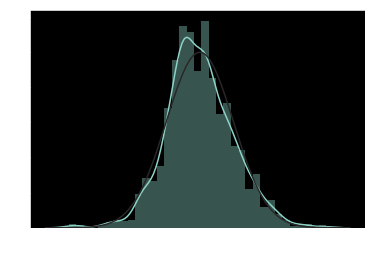

<Figure size 432x288 with 0 Axes>

In [23]:
train_labels = np.log(train_labels)

sns.distplot(train_labels, fit = norm)
fig = plt.figure()

# Data Splitting

In [25]:
from sklearn.model_selection import train_test_split

df_full = df_full[['Id'] + chosen_cat + chosen_num]

train_set = df_full.loc['train']
train_set.drop(['Id'], axis = 1, inplace = True)
test_set = df_full.loc['test']

train_labels = train_labels.loc[train_set.index]

x_train, x_val, y_train, y_val = train_test_split(train_set, train_labels, test_size = 0.2, random_state = 1)
print('Train:', x_train.shape, y_train.shape)
print('Val:', x_val.shape, y_val.shape)

Train: (1167, 48) (1167,)
Val: (292, 48) (292,)


In [26]:
y_train.head(10)

757     11.976030
598     12.289954
215     11.808948
135     12.066811
372     11.736069
1215    11.736069
620     11.112448
298     12.072541
1335    12.031124
774     12.886641
Name: SalePrice, dtype: float64

## LightGBM

In [27]:
import lightgbm as lgb

In [28]:
train_ds = lgb.Dataset(x_train, label = y_train)
val_ds = lgb.Dataset(x_val, label = y_val)

watchlist = [train_ds, val_ds]

params = {
    'learning_rate': 0.01, 
    'boosting': 'gbdt', 
    'objective': 'regression', 
    'max_depth': -1,
    'seed': 191, 
    'num_leaves': 31,
    'metric': 'rmse',
    'nthreads': 8,
    'lambda_l1': 0.5,
    'verbose': -1
}

import gc
gc.collect()

7

In [29]:
lgb_model = lgb.train(params, train_ds, 700,
                      valid_sets = watchlist,
                      verbose_eval = 20, early_stopping_rounds = 200)

Training until validation scores don't improve for 200 rounds.
[20]	training's rmse: 0.339885	valid_1's rmse: 0.350875
[40]	training's rmse: 0.293361	valid_1's rmse: 0.306141
[60]	training's rmse: 0.255816	valid_1's rmse: 0.27149
[80]	training's rmse: 0.225319	valid_1's rmse: 0.244264
[100]	training's rmse: 0.20066	valid_1's rmse: 0.222153
[120]	training's rmse: 0.180543	valid_1's rmse: 0.204677
[140]	training's rmse: 0.163961	valid_1's rmse: 0.190776
[160]	training's rmse: 0.150309	valid_1's rmse: 0.1793
[180]	training's rmse: 0.139256	valid_1's rmse: 0.170449
[200]	training's rmse: 0.130641	valid_1's rmse: 0.164356
[220]	training's rmse: 0.123525	valid_1's rmse: 0.159128
[240]	training's rmse: 0.117645	valid_1's rmse: 0.154908
[260]	training's rmse: 0.112651	valid_1's rmse: 0.15109
[280]	training's rmse: 0.108418	valid_1's rmse: 0.147926
[300]	training's rmse: 0.104815	valid_1's rmse: 0.145407
[320]	training's rmse: 0.101582	valid_1's rmse: 0.143131
[340]	training's rmse: 0.098657	va

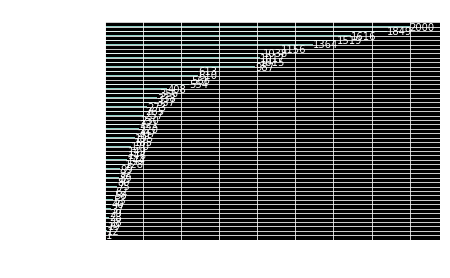

In [30]:
lgb.plot_importance(lgb_model)

# Test

In [31]:
test_set.head()

,Id,OverallQual,LandContour,YearRemodAdd,CentralAir,BsmtFullBath,YearBuilt,ExterQual,ExterCond,OverallCond,MoSold,Foundation,SaleType,Neighborhood,Fireplaces,FullBath,LotConfig,Exterior1st,LotShape,KitchenQual,Exterior2nd,HalfBath,MSSubClass,GarageCars,RoofStyle,PavedDrive,YrSold,Electrical,KitchenAbvGr,HouseStyle,Functional,BldgType,SaleCondition,BedroomAbvGr,HeatingQC,MSZoning,BsmtHalfBath,Condition1,LandSlope,TotRmsAbvGrd,EnclosedPorch,1stFlrSF,WoodDeckSF,GrLivArea,LotArea,2ndFlrSF,TotalBsmtSF,OpenPorchSF,ScreenPorch
0,1461,5,3,1961,1,0.0,1961,3,4,6,6,1,8,12,0,1,4,12,3,3,13,0,20,1.0,1,2,2010,4,1,2,6,0,4,2,4,2,0.0,1,0,5,0.0,6.797940,4.941642,6.797940,9.360655,0.000000,6.782192,0.000000,4.787492
1,1462,6,3,1958,1,0.0,1958,3,4,6,6,1,8,12,0,1,0,13,0,2,14,1,20,1.0,3,2,2010,4,1,2,6,0,4,3,4,3,0.0,2,0,6,0.0,7.192182,5.973810,7.192182,9.565704,0.000000,7.192182,3.583519,0.000000
2,1463,5,3,1998,1,0.0,1997,3,4,5,3,2,8,8,1,2,4,12,0,3,13,1,60,2.0,1,2,2010,4,1,5,6,0,4,3,2,3,0.0,2,0,6,0.0,6.833032,5.356586,7.395722,9.534595,6.552508,6.833032,3.526361,0.000000
3,1464,6,3,1998,1,0.0,1998,3,4,6,6,2,8,8,1,2,4,12,0,2,13,1,60,2.0,1,2,2010,4,1,5,6,0,4,3,0,3,0.0,2,0,7,0.0,6.830874,5.886104,7.380256,9.208138,6.519147,6.830874,3.583519,0.000000
4,1465,8,1,1992,1,0.0,1992,2,4,5,1,2,8,22,0,2,4,6,0,2,6,0,120,2.0,1,2,2010,4,1,2,6,4,4,2,0,3,0.0,2,0,5,0.0,7.154615,0.000000,7.154615,8.518193,0.000000,7.154615,4.406719,4.969813


In [40]:
test_id = test_set['Id']
test_id.head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [34]:
test_set.isna().sum().max()

0

In [41]:
test_set.drop(['Id'], axis = 1, inplace = True)

preds = lgb_model.predict(test_set)
preds = np.exp(preds)
print(preds.shape)
preds

(1459,)


array([120177.11514856, 151802.83573682, 169600.38661453, ...,
       166640.48740753, 120617.75183461, 223740.47579832])

In [42]:
submission = pd.DataFrame({'Id': test_id, 'SalePrice': preds})
submission.head(10)

,Id,SalePrice
0,1461,120177.115149
1,1462,151802.835737
2,1463,169600.386615
3,1464,181628.066985
4,1465,186375.446526
5,1466,179538.879255
6,1467,171953.252006
7,1468,169863.730707
8,1469,181183.723095
9,1470,124048.299356


In [43]:
submission.to_csv('submission.csv', index = False)